In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline


In [2]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

<Axes: xlabel='casual', ylabel='Count'>

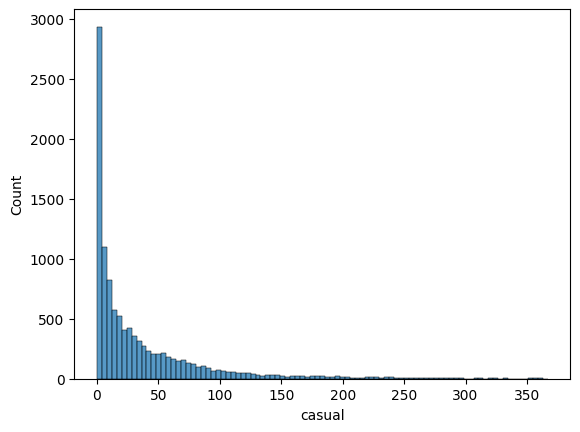

In [4]:
sns.histplot(bikes.casual)

In [14]:
bikes.casual.describe()

count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64

In [18]:
def casual_category(x):
    if x >= 0 and x <= 4:
        return 0
    elif x > 4 and x <= 17:
        return 1
    elif x >17 and x <= 49:
        return 2
    elif x > 49:
        return 3

In [19]:
bikes['casual_cat'] = bikes['casual'].apply(casual_category)

In [35]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,casual_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0


In [24]:
x = np.array(bikes[['temp','humidity']])
y = np.array(bikes['casual_cat'])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)

In [30]:
knn = KNeighborsClassifier(n_neighbors=100)

In [31]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [32]:
y_pred = knn.predict(x_test)

In [33]:
print(accuracy_score(y_pred, y_test))

0.48438934802571165
